Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Name    1000

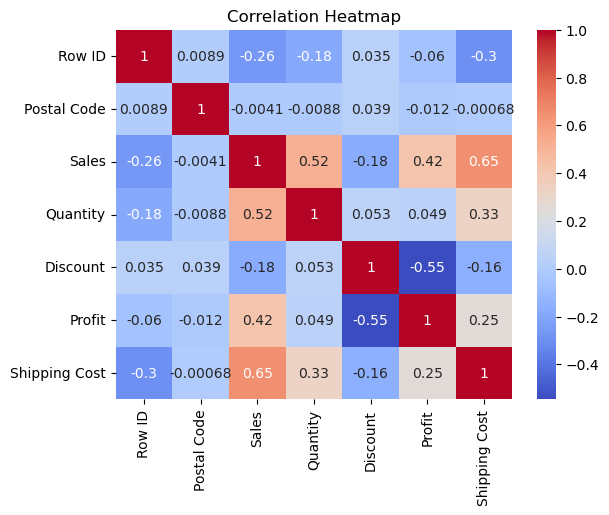


Generating Sales Histogram...


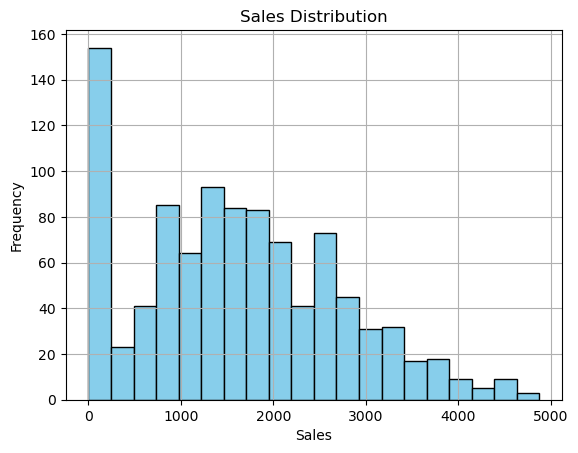


Generating Sales Boxplot...


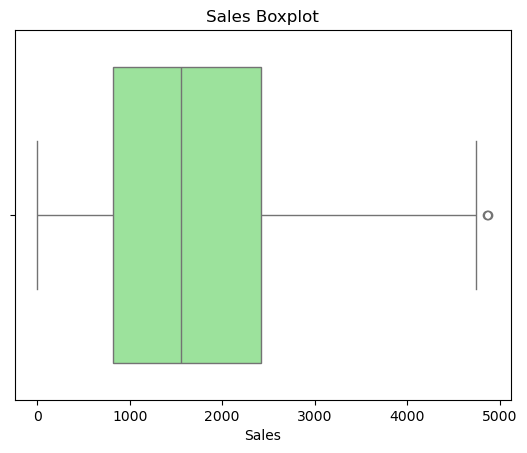

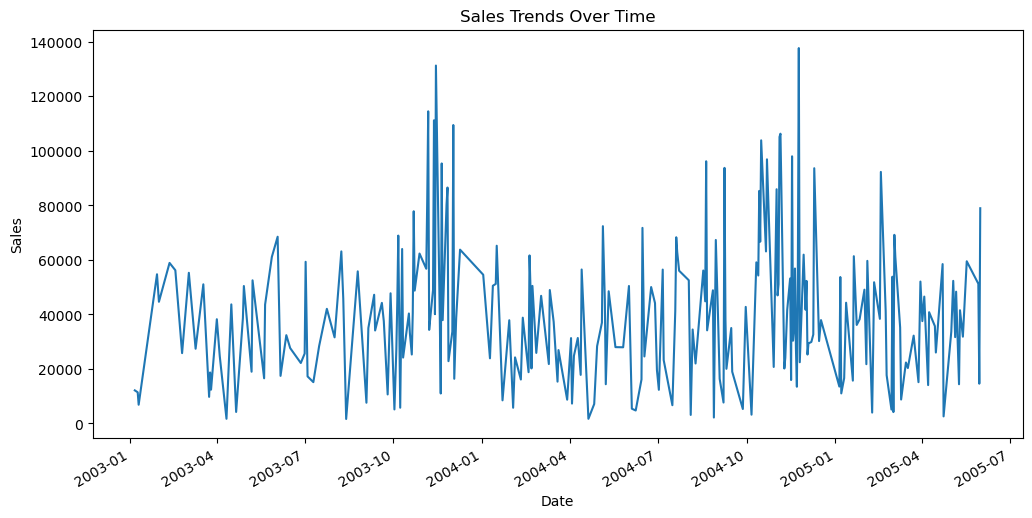

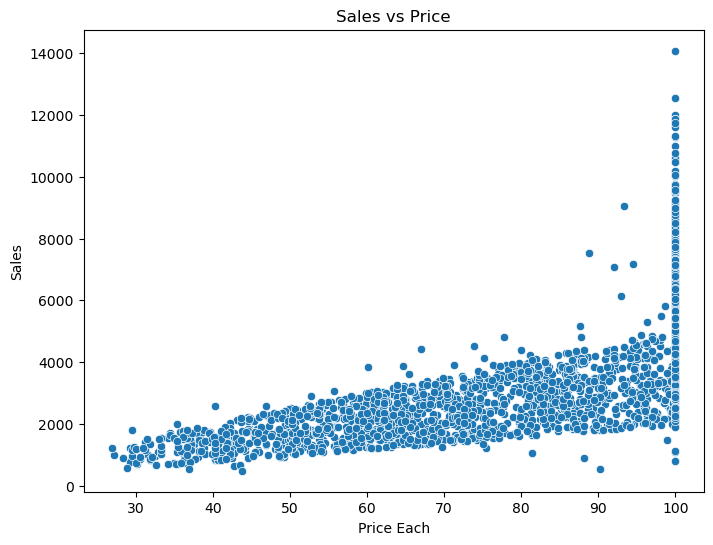

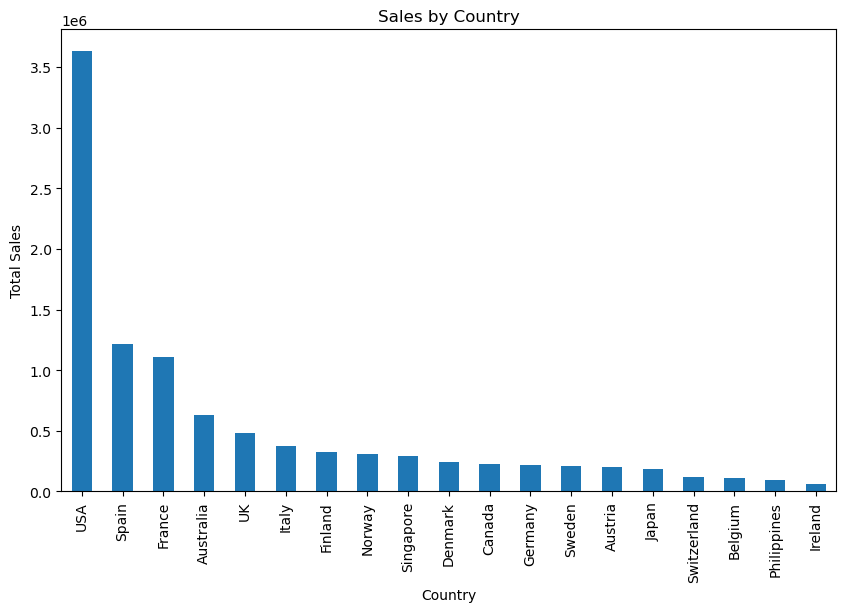

R² Score: 0.6885468480396753
Mean Squared Error: 1359458.7982060877


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r'C:\Users\hp\Downloads\Global_Superstore(CSV).csv'  # Adjusted to uploaded path
data = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

# Data Cleaning
# Handle missing values
# Fill NaN values in numeric columns with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Drop rows with missing values in non-numeric columns
data.dropna(inplace=True)

# Remove duplicates
data = data.drop_duplicates()

# Detect and handle outliers in 'Sales' column
if 'Sales' in data.columns:
    Q1 = data['Sales'].quantile(0.25)
    Q3 = data['Sales'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data['Sales'] >= Q1 - 1.5 * IQR) & (data['Sales'] <= Q3 + 1.5 * IQR)]

# Statistical Analysis for 'Sales'
if 'Sales' in data.columns:
    print("\nStatistical Analysis for 'Sales':")
    print(f"Mean Sales: {data['Sales'].mean()}")
    print(f"Median Sales: {data['Sales'].median()}")
    print(f"Standard Deviation of Sales: {data['Sales'].std()}")
    print(f"Variance of Sales: {data['Sales'].var()}")

# Correlation Heatmap
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
if not numeric_data.empty:  # Ensure there are numeric columns for correlation
    print("\nGenerating Correlation Heatmap...")
    corr_matrix = numeric_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("\nNo numeric columns available for correlation.")

# Visualizations
# Histogram for 'Sales'
if 'Sales' in data.columns:
    print("\nGenerating Sales Histogram...")
    data['Sales'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title("Sales Distribution")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

# Boxplot for 'Sales'
if 'Sales' in data.columns:
    print("\nGenerating Sales Boxplot...")
    sns.boxplot(x=data['Sales'], color='lightgreen')
    plt.title("Sales Boxplot")
    plt.xlabel("Sales")
    plt.show()

# ============== Project 2: Sales Performance Analysis ==============
# Load the sales dataset (replace 'sales_data.csv' with your actual file)
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
file_path = r'C:\Users\hp\Downloads\sales_data_sample.csv'
sales_data = pd.read_csv(file_path, encoding='latin1')

# Data Cleaning
sales_data.drop_duplicates(inplace=True)

# Fill missing numeric values with column means
numeric_cols = sales_data.select_dtypes(include=[np.number]).columns
sales_data[numeric_cols] = sales_data[numeric_cols].fillna(sales_data[numeric_cols].mean())

# Convert ORDERDATE to datetime
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')

# Drop rows with invalid dates
sales_data.dropna(subset=['ORDERDATE'], inplace=True)

# Exploratory Data Analysis
# Time-series plot
sales_trends = sales_data.groupby('ORDERDATE')['SALES'].sum()
plt.figure(figsize=(12, 6))
sales_trends.plot()
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRICEEACH', y='SALES', data=sales_data)
plt.title("Sales vs Price")
plt.xlabel("Price Each")
plt.ylabel("Sales")
plt.show()

# Bar chart
region_sales = sales_data.groupby('COUNTRY')['SALES'].sum()
plt.figure(figsize=(10, 6))
region_sales.sort_values(ascending=False).plot(kind='bar')
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()

# Predictive Modeling
# Prepare data for modeling
# Using 'PRICEEACH' and 'QUANTITYORDERED' as features
X = sales_data[['PRICEEACH', 'QUANTITYORDERED']]
y = sales_data['SALES']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))